In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal,Lorentzian,Quantile_Normal,Quantile_Lorentzian
from scipy.signal import find_peaks
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Get_groups import phase_diagram
import parmap
from tqdm.notebook import tqdm

from TO_sim.Utility import Create_Folder

In [54]:
seed =11
N = 10
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 0
t = np.arange(0,100,0.1)
K = 2
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

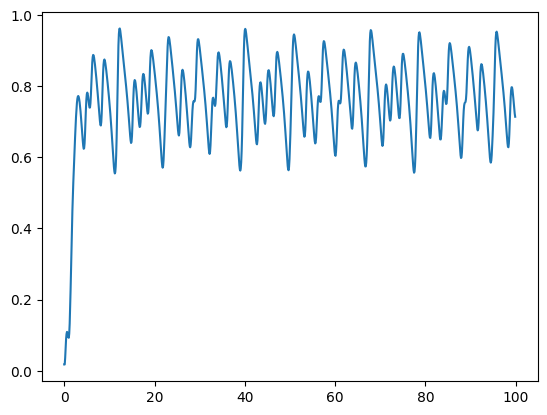

In [55]:
plt.plot(t,rs)

In [56]:
z = theta.T

In [57]:
x = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(x),'y':np.sin(x)
}

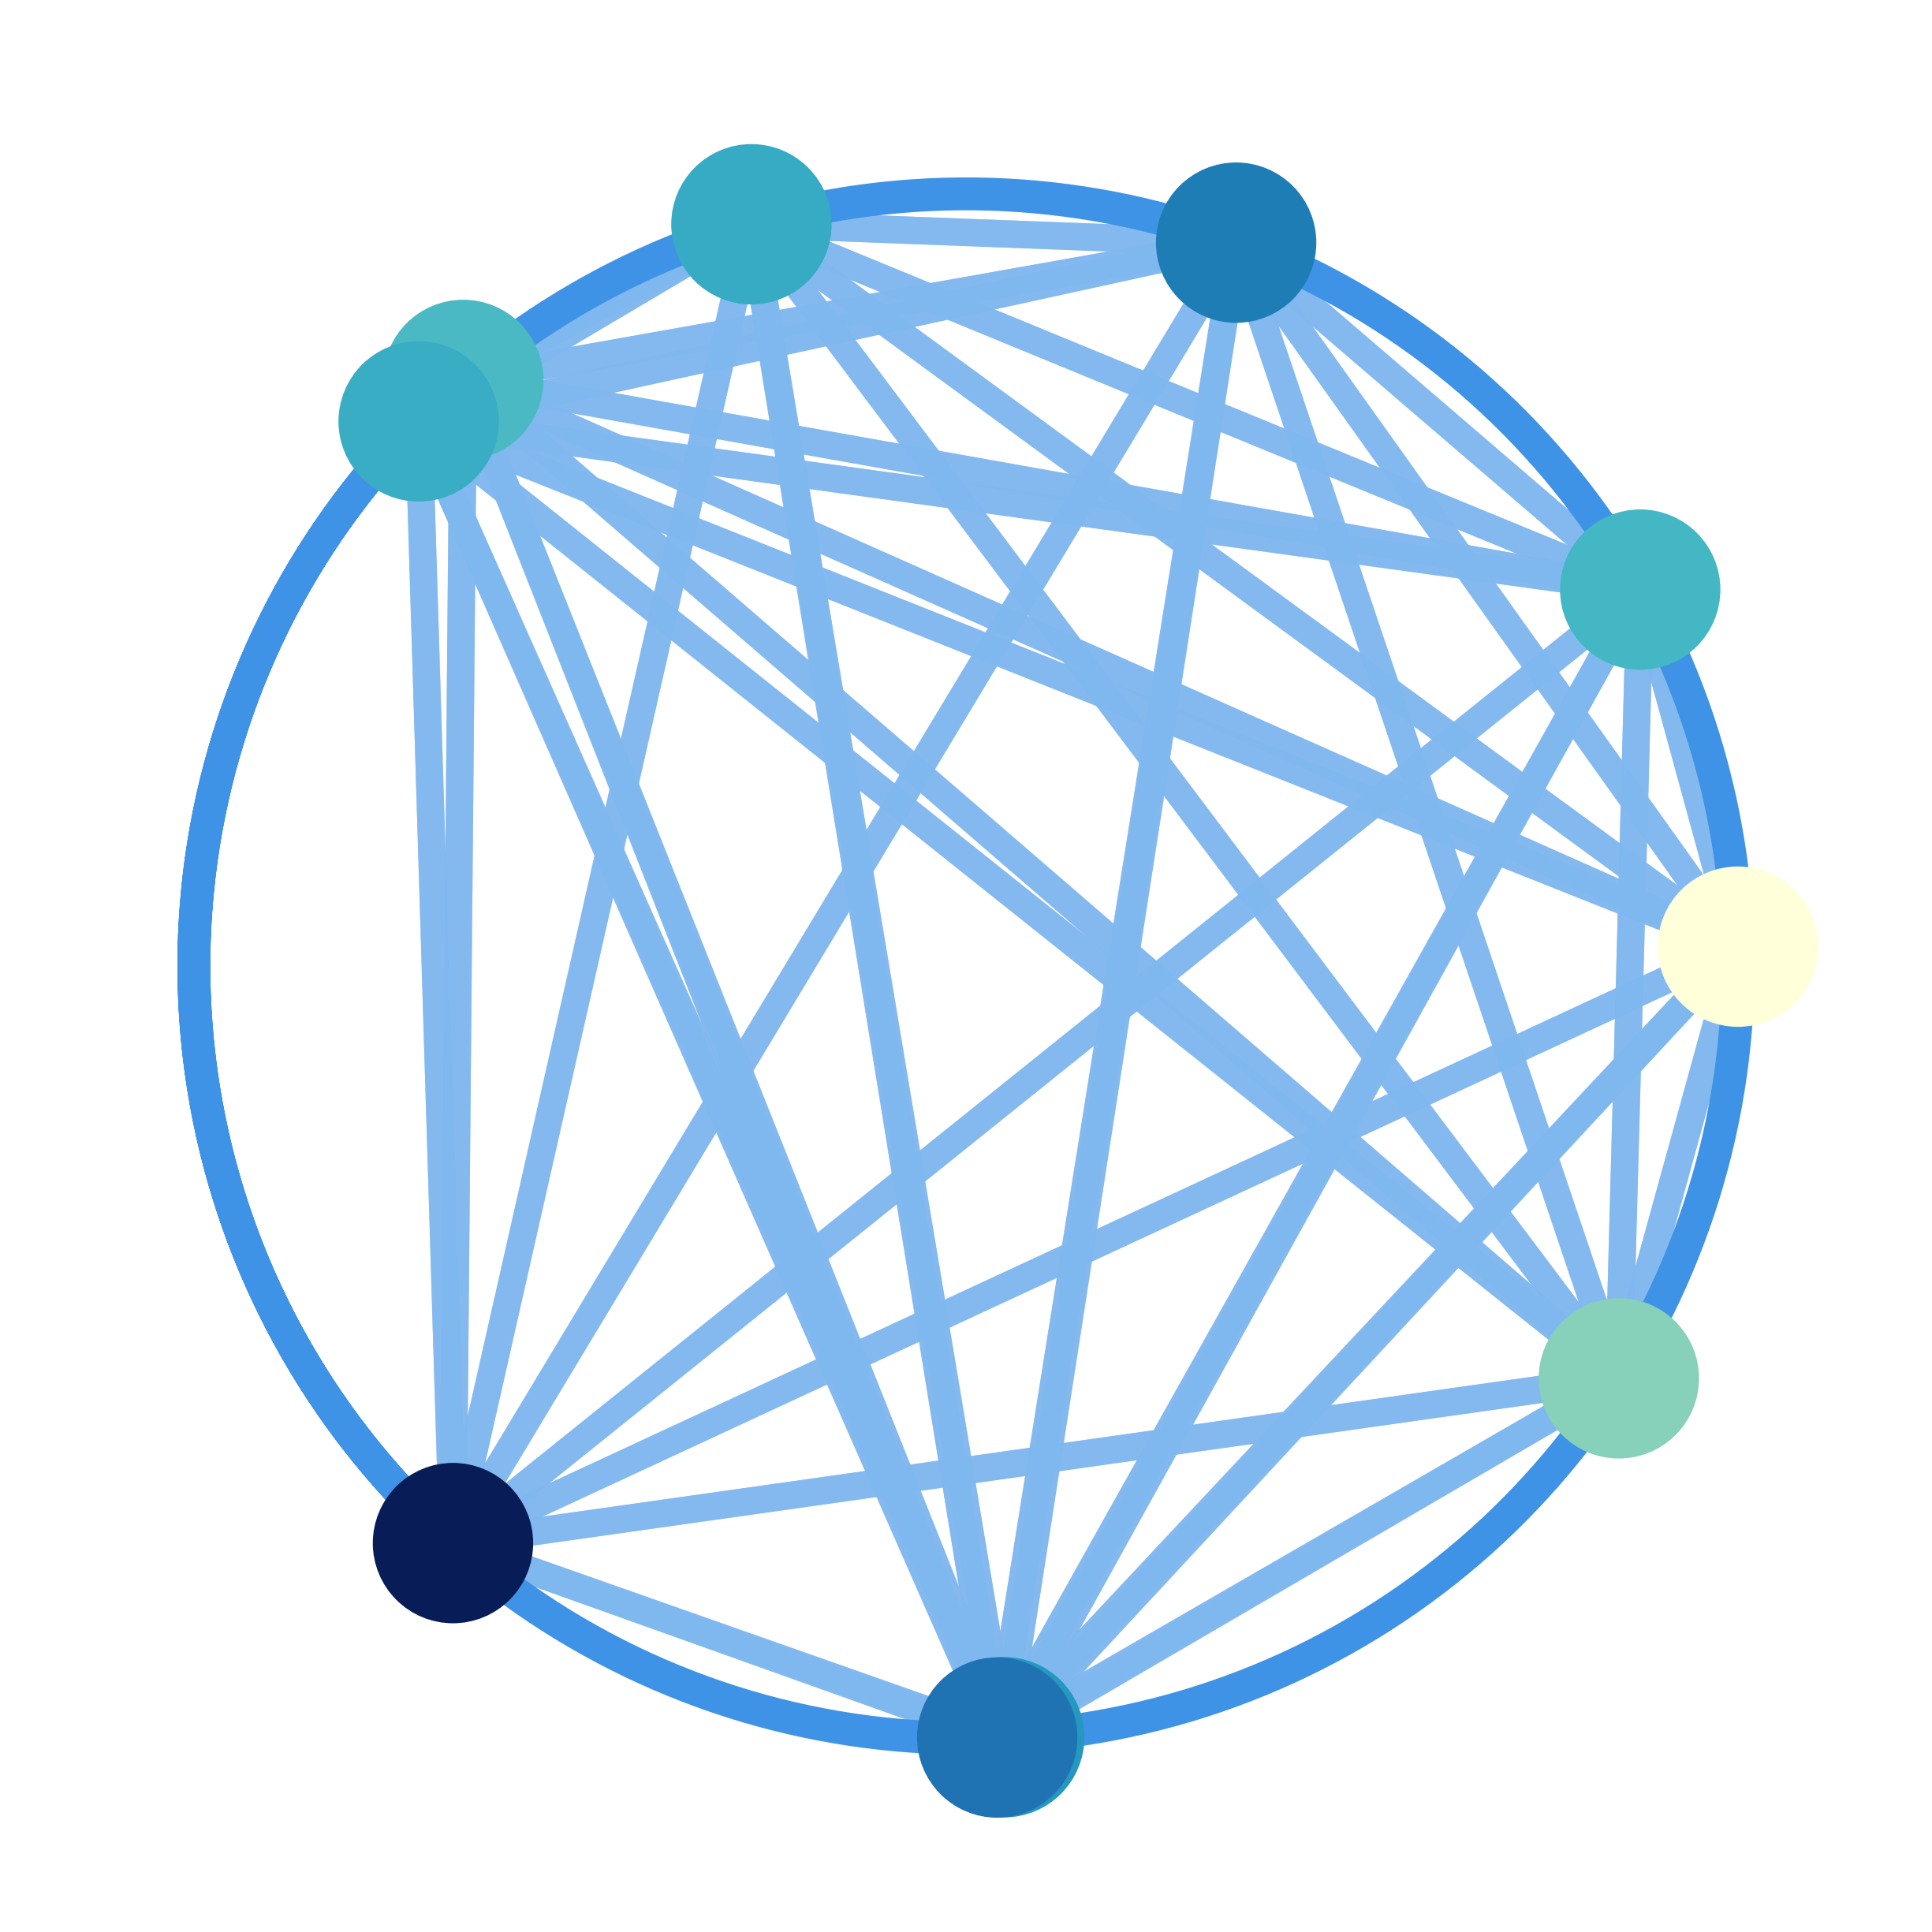

In [89]:
from itertools import combinations,permutations

i = 10
index = i
# fig = plt.figure(figsize=(5,5))
colors = ['#9D281B','#DC4838']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': np.sin(z[:,i]),'y':np.cos(z[:,i]),
    'c': omega,'cmap':'YlGnBu',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':800
}
X = np.sin(z[:,i])
Y = np.cos(z[:,i])
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
# plt.plot(tempx,tempy)
lw = 5
# colors = ['#9D281B','#DC4838']
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='#7FB7EF',zorder=0,lw=lw,alpha=0.8)
# ax.plot([0,np.mean(X)],[0,np.mean(Y)],color='#9D281B',lw=3,marker='o')
i = index

ax.plot(np.cos(x),np.sin(x),zorder=0,color='#3F93E6',lw=6)
cax = ax.scatter(**data,zorder=1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [64]:
import scipy.stats as ss

In [74]:
mu = 0
g = lambda x : ss.norm.pdf(x,loc = mu, scale =1.0)
# omega_gen = lambda N : ss.cauchy.rvs(loc = 0, scale =2, size = N)
omega_gen = lambda N : ss.norm.rvs(loc = mu, scale =1.0, size = N)
theta_gen = lambda N : np.linspace(-np.pi,np.pi,N,endpoint=False)
Kc = 2/(np.pi*g(mu))

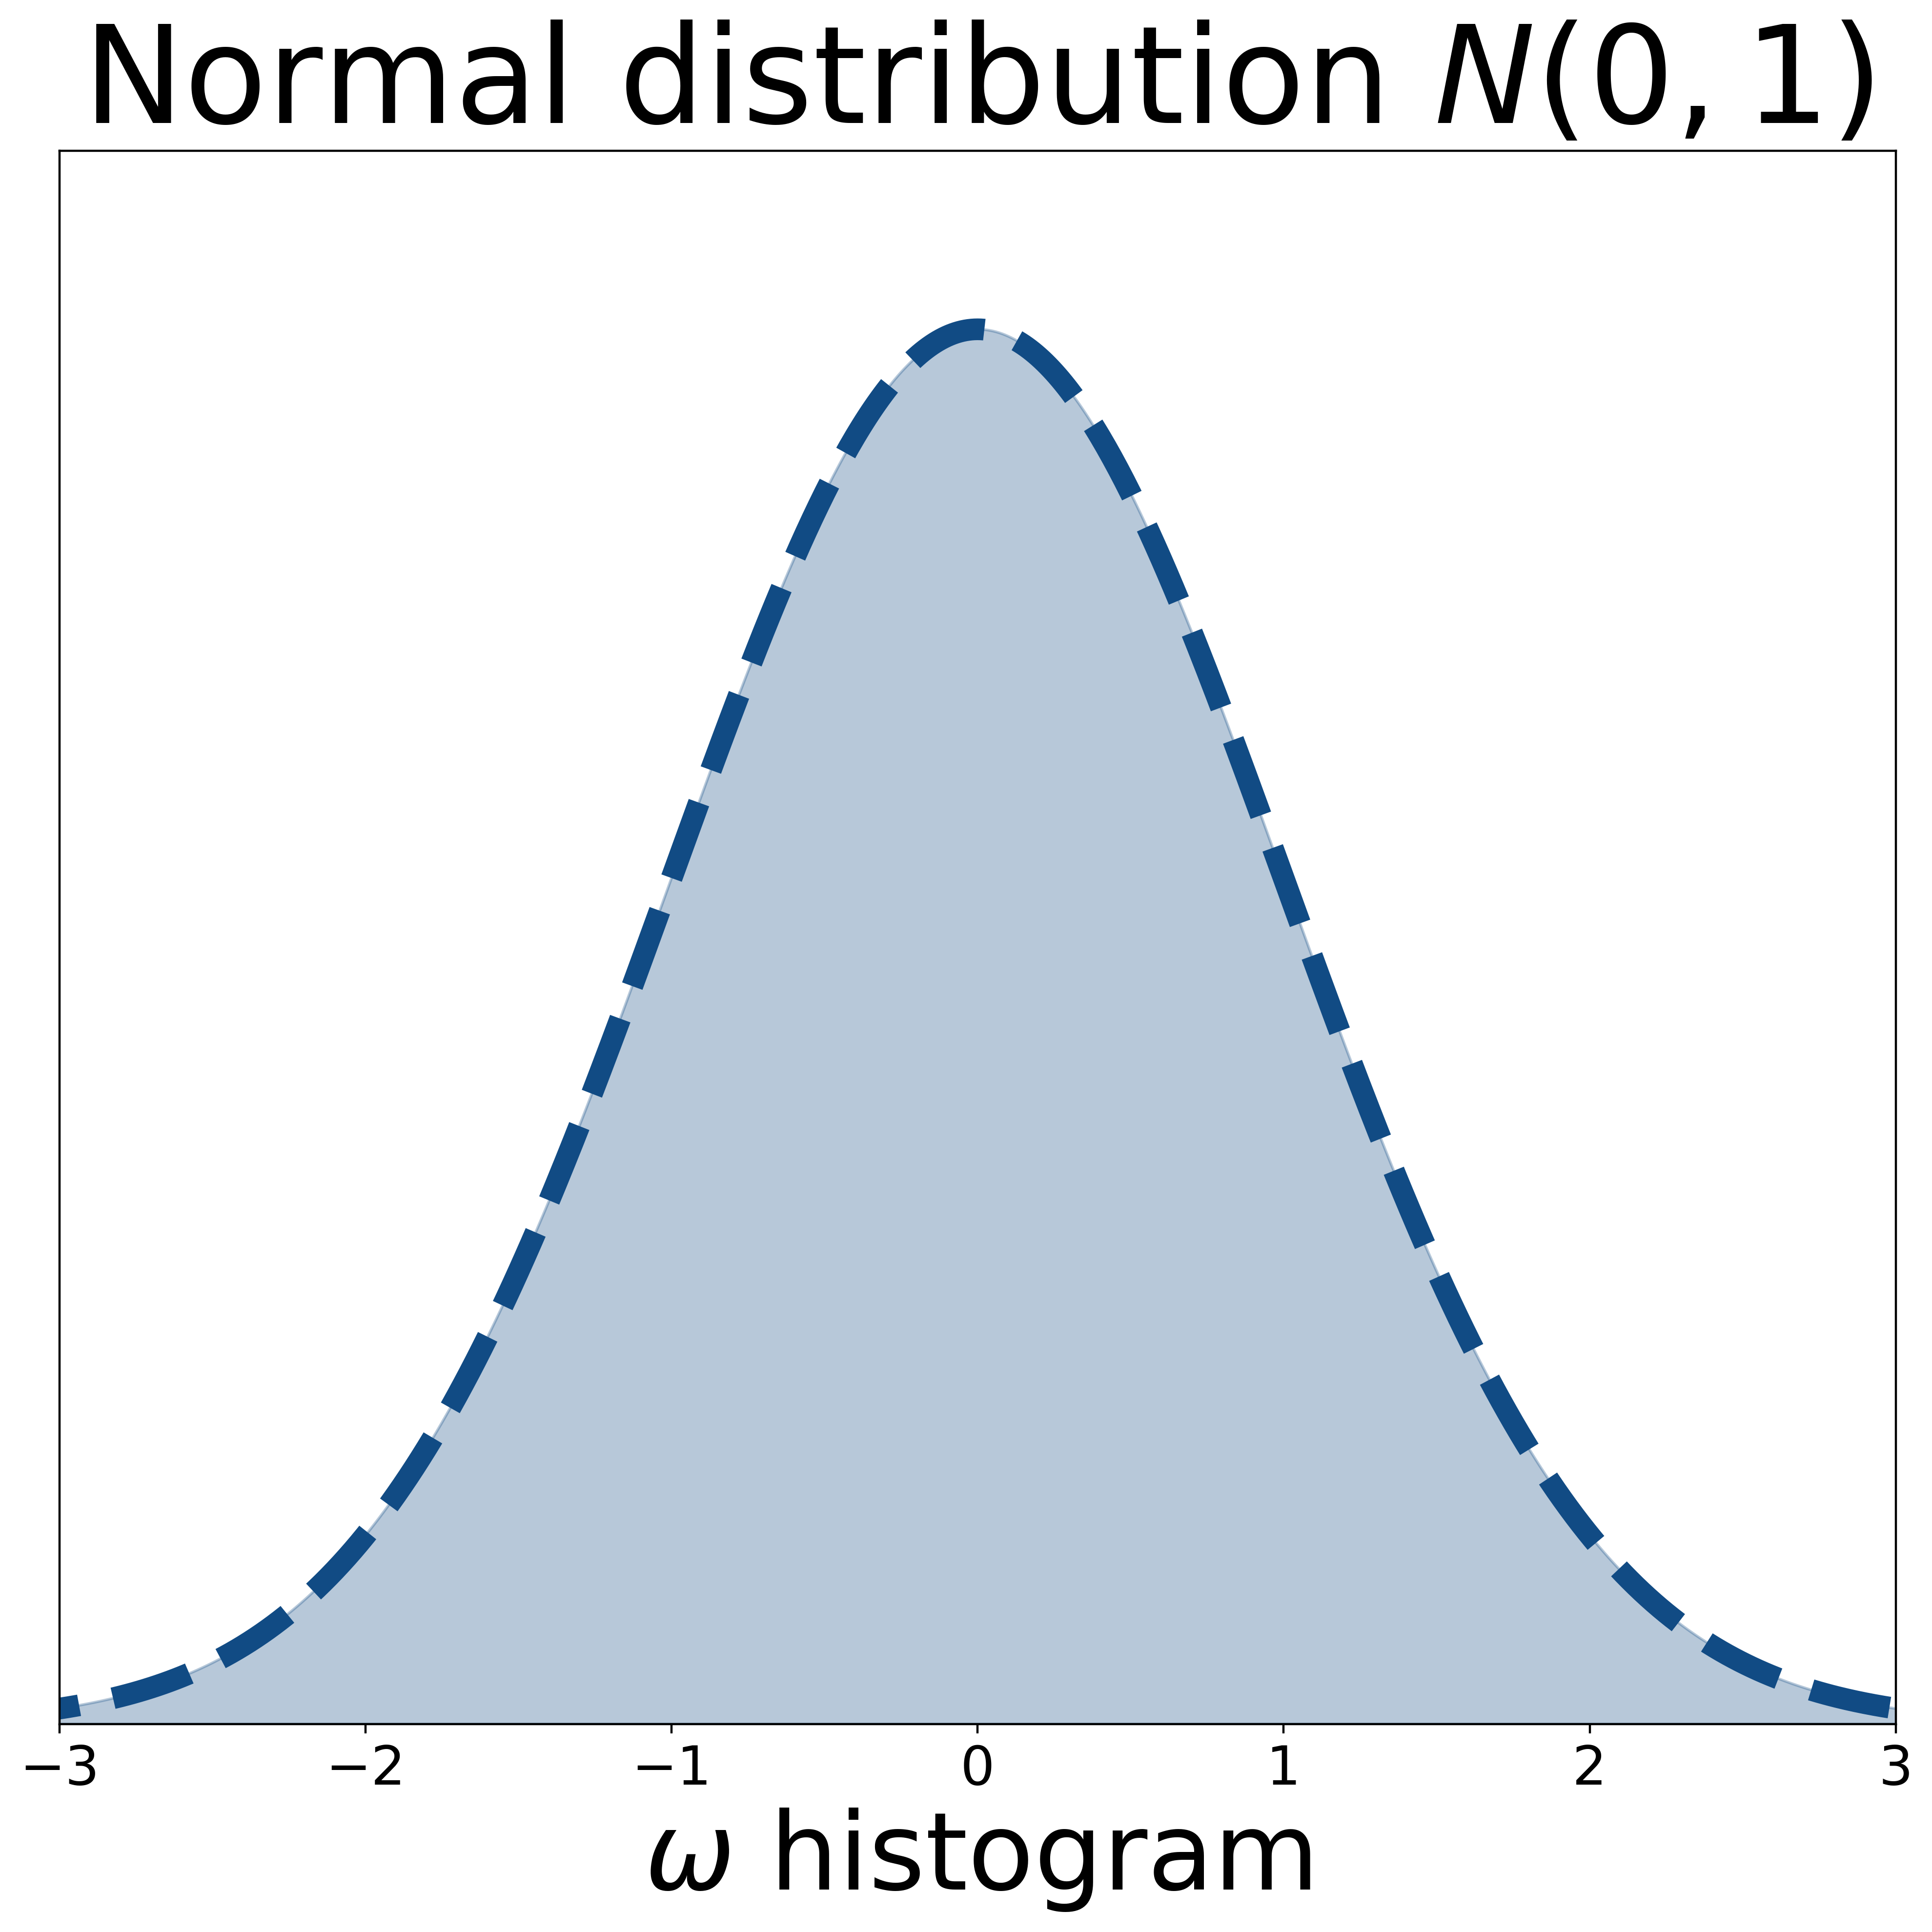

In [86]:
plt.figure(figsize=(10,10),dpi=400)
x = np.arange(-4,4,0.01)
# plt.hist(omega_gen(500),bins=100,density=True,color='#DC4838')
plt.xlabel(r'$\omega$ histogram',fontsize=40)
plt.ylabel('Density',fontsize=15)
plt.plot(x,g(x),lw=8,ls='--',color='#114B84')
plt.fill_between(x,g(x),color='#114B84',alpha=0.3)
plt.title(r'Normal distribution $N(0,1)$',fontsize=50)
plt.tight_layout()
plt.xticks(fontsize = 20)
plt.xlim(-3,3)
plt.ylim(0,0.45)
now = plt.gca()
now.axes.get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig('./DATA_FILE/Normal distribution.jpg',dpi=800, transparent = True)
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig(d)